In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path
import glob
import scipy.stats as stats

#import api_key
#from api_keys import api_keys

In [2]:
#Createing path to CSV files
Flu_path = Path("../Resources/State_FluData.csv")
Temp_path = Path("../Resources/State_Temp.csv")

In [3]:
#Create Flu data frame
Flu_df = pd.read_csv(Flu_path)
Flu_df.head()

ILINet
REGION TYPE REGION   YEAR WEEK % WEIGHTED ILI %UNWEIGHTED ILI AGE 0-4 AGE 25-49 AGE 25-64 AGE 5-24 AGE 50-64 AGE 65 ILITOTAL NUM. OF PROVIDERS  TOTAL PATIENTS
States      Alabama  2010 40   X              2.13477         X       X         X         X        X         X      249      35                          11664
            Alaska   2010 40   X              0.875146        X       X         X         X        X         X      15       7                            1714
            Arizona  2010 40   X              0.674721        X       X         X         X        X         X      172      49                          25492
            Arkansas 2010 40   X              0.696056        X       X         X         X        X         X      18       15                           2586

In [4]:
#Create Temperature data frame
Temp_df = pd.read_csv(Temp_path)
Temp_df.head()

,State,Year,Month,Week,AverageTemperature
0,Alabama,2016,1,53,44.565887
1,Alabama,2016,1,1,45.227760
2,Alabama,2016,1,2,43.475330
3,Alabama,2016,1,3,39.243889
4,Alabama,2016,1,4,48.005981


In [5]:
Flu_df = Flu_df.reset_index()
Flu_df.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,ILINet
0,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1,States,Alabama,2010,40,X,2.13477,X,X,X,X,X,X,249,35,11664
2,States,Alaska,2010,40,X,0.875146,X,X,X,X,X,X,15,7,1714
3,States,Arizona,2010,40,X,0.674721,X,X,X,X,X,X,172,49,25492
4,States,Arkansas,2010,40,X,0.696056,X,X,X,X,X,X,18,15,2586


In [6]:
Flu_df.columns

Index(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5',
       'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11',
       'level_12', 'level_13', 'ILINet'],
      dtype='object')

In [7]:
Flu_df = Flu_df.rename(columns={'level_0':'Region Type','level_1':'Region','level_2':'Year','level_3':'Week','level_4':'% Weighted ILI','level_5':'% Unweighted ILI',
                                  'level_6':'Ages 0-4','level_7':'Ages 25-49','level_8':'Ages 25-64','level_9':'Ages 5-24','level_10':'Ages 50-64',
                                  'level_11':'Ages 65+','level_12':'ILITotal','level_13':'# Providers'})
Flu_df.head()
                       

,Region Type,Region,Year,Week,% Weighted ILI,% Unweighted ILI,Ages 0-4,Ages 25-49,Ages 25-64,Ages 5-24,Ages 50-64,Ages 65+,ILITotal,# Providers,ILINet
0,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1,States,Alabama,2010,40,X,2.13477,X,X,X,X,X,X,249,35,11664
2,States,Alaska,2010,40,X,0.875146,X,X,X,X,X,X,15,7,1714
3,States,Arizona,2010,40,X,0.674721,X,X,X,X,X,X,172,49,25492
4,States,Arkansas,2010,40,X,0.696056,X,X,X,X,X,X,18,15,2586


In [8]:
Flu_df.columns

Index(['Region Type', 'Region', 'Year', 'Week', '% Weighted ILI',
       '% Unweighted ILI', 'Ages 0-4', 'Ages 25-49', 'Ages 25-64', 'Ages 5-24',
       'Ages 50-64', 'Ages 65+', 'ILITotal', '# Providers', 'ILINet'],
      dtype='object')

In [9]:
Flu_df = Flu_df.drop(['Region Type','% Weighted ILI','% Unweighted ILI','Ages 25-64','# Providers','Ages 0-4', 'Ages 25-49', 'Ages 25-64', 'Ages 5-24',
       'Ages 50-64', 'Ages 65+'],axis=1)

Flu_df = Flu_df.drop([0],axis=0)
Flu_df.head()

,Region,Year,Week,ILITotal,ILINet
1,Alabama,2010,40,249,11664
2,Alaska,2010,40,15,1714
3,Arizona,2010,40,172,25492
4,Arkansas,2010,40,18,2586
5,California,2010,40,632,32342


In [10]:
#Flu_df = Flu_df.reindex(columns=['Region','Year','Week','ILI Total'])
Flu_df.head()

,Region,Year,Week,ILITotal,ILINet
1,Alabama,2010,40,249,11664
2,Alaska,2010,40,15,1714
3,Arizona,2010,40,172,25492
4,Arkansas,2010,40,18,2586
5,California,2010,40,632,32342


In [11]:
Flu_df['Date']= pd.to_datetime(Flu_df.Year.astype(str)+
                                '-'+ Flu_df.Week.astype(str)+ '-1', format= "%Y-%W-%w")
Flu_df

,Region,Year,Week,ILITotal,ILINet,Date
1,Alabama,2010,40,249,11664,2010-10-04
2,Alaska,2010,40,15,1714,2010-10-04
3,Arizona,2010,40,172,25492,2010-10-04
4,Arkansas,2010,40,18,2586,2010-10-04
5,California,2010,40,632,32342,2010-10-04
...,...,...,...,...,...,...
35564,Wyoming,2023,20,7,1785,2023-05-15
35565,Commonwealth of the Northern Mariana Islands,2023,20,X,X,2023-05-15
35566,Puerto Rico,2023,20,172,1708,2023-05-15
35567,Virgin Islands,2023,20,1,766,2023-05-15


In [12]:
Flu_df = Flu_df.drop(['Year','Week'],axis=1)
Flu_df

,Region,ILITotal,ILINet,Date
1,Alabama,249,11664,2010-10-04
2,Alaska,15,1714,2010-10-04
3,Arizona,172,25492,2010-10-04
4,Arkansas,18,2586,2010-10-04
5,California,632,32342,2010-10-04
...,...,...,...,...
35564,Wyoming,7,1785,2023-05-15
35565,Commonwealth of the Northern Mariana Islands,X,X,2023-05-15
35566,Puerto Rico,172,1708,2023-05-15
35567,Virgin Islands,1,766,2023-05-15


In [13]:
Temp_df= Temp_df.dropna()
Temp_df
Temp_df['Date']= pd.to_datetime(Temp_df.Year.astype(str)+'-'+ Temp_df.Week.astype(str)+ '-1', format= "%Y-%W-%w")
Temp_df
Temp_df=Temp_df.drop(['Year','Week','Month'], axis=1)

Temp_df

,State,AverageTemperature,Date
0,Alabama,44.565887,2017-01-02
1,Alabama,45.227760,2016-01-04
2,Alabama,43.475330,2016-01-11
3,Alabama,39.243889,2016-01-18
4,Alabama,48.005981,2016-01-25
...,...,...,...
2115,Tennessee,38.300606,2020-12-07
2116,Tennessee,44.592144,2020-12-14
2117,Tennessee,37.202797,2020-12-21
2118,Tennessee,38.019409,2020-12-28


In [14]:
Merge_df= Temp_df.merge(Flu_df, how ='outer')
display(Merge_df)

,State,AverageTemperature,Date,Region,ILITotal,ILINet
0,Alabama,44.565887,2017-01-02,Alabama,275,6268
1,Alabama,44.565887,2017-01-02,Alaska,13,1526
2,Alabama,44.565887,2017-01-02,Arizona,540,22690
3,Alabama,44.565887,2017-01-02,Arkansas,56,2913
4,Alabama,44.565887,2017-01-02,California,1559,47724
...,...,...,...,...,...,...
136796,NaN,NaN,2023-05-15,Wyoming,7,1785
136797,NaN,NaN,2023-05-15,Commonwealth of the Northern Mariana Islands,X,X
136798,NaN,NaN,2023-05-15,Puerto Rico,172,1708
136799,NaN,NaN,2023-05-15,Virgin Islands,1,766


In [15]:
Merge_df=Merge_df.dropna()
Merge_df


,State,AverageTemperature,Date,Region,ILITotal,ILINet
0,Alabama,44.565887,2017-01-02,Alabama,275,6268
1,Alabama,44.565887,2017-01-02,Alaska,13,1526
2,Alabama,44.565887,2017-01-02,Arizona,540,22690
3,Alabama,44.565887,2017-01-02,Arkansas,56,2913
4,Alabama,44.565887,2017-01-02,California,1559,47724
...,...,...,...,...,...,...
115443,Tennessee,43.497963,2021-01-04,Wyoming,28,2933
115444,Tennessee,43.497963,2021-01-04,Commonwealth of the Northern Mariana Islands,X,X
115445,Tennessee,43.497963,2021-01-04,Puerto Rico,95,1713
115446,Tennessee,43.497963,2021-01-04,Virgin Islands,1,888


(0.0, 99999.0)

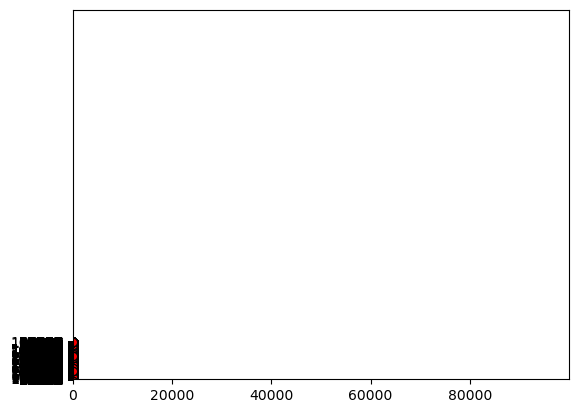

In [16]:
Temp= Merge_df['AverageTemperature']
Cases= Merge_df['ILINet']
plt.scatter(Temp, Cases, marker="o", facecolors= "red", edgecolors="black")
plt.ylim(1000,99999)
plt.xlim(0,99999)